In [72]:
import pandas as pd
import seaborn as sb

In [12]:
catch_id = 2006348  # Tana a bit U/S of Polmak
xl_url = f"https://hypewebapp.smhi.se/arctichype/time-series/download/{catch_id}"
raw_df = pd.read_excel(xl_url, sheet_name="River discharge")
raw_df.head()

,Month,River discharge (m3/s)
0,1979-01,10.839000
1,1979-02,6.727000
2,1979-03,5.013000
3,1979-04,14.631000
4,1979-05,293.717987


In [68]:
hype_df = raw_df.copy()
hype_df['Month'] = pd.to_datetime(hype_df['Month'], format="%Y-%m")
hype_df.set_index("Month", drop=True, inplace=True)
hype_df.columns = ['HYPE Q']
hype_df.asfreq('m')
hype_df = hype_df.to_period("m")
hype_df.head()

,HYPE Q
Month,
1979-01,10.839000
1979-02,6.727000
1979-03,5.013000
1979-04,14.631000
1979-05,293.717987


In [69]:
nve_fpath = r'../data/NVE/NVE_Q_download_2022-01-20_unstacked.csv'
nve_Q = pd.read_csv(nve_fpath, header=1, index_col=0)
nve_Q.index = pd.to_datetime(nve_Q.index).tz_localize(None)
nve_Q.head()

,Cærrogæsjokka,Jiesjokka,Julelv,Njalmigoaika,Polmak,Polmak nye,Smalfjord,"Veahkkava, Iesjokka"
datetime,,,,,,,,
1911-07-24 11:00:00,NaN,NaN,NaN,NaN,253.3038,NaN,NaN,NaN
1911-07-25 11:00:00,NaN,NaN,NaN,NaN,241.0981,NaN,NaN,NaN
1911-07-26 11:00:00,NaN,NaN,NaN,NaN,235.1423,NaN,NaN,NaN
1911-07-27 11:00:00,NaN,NaN,NaN,NaN,232.2008,NaN,NaN,NaN
1911-07-28 11:00:00,NaN,NaN,NaN,NaN,238.1080,NaN,NaN,NaN


In [70]:
nve_Q_m = nve_Q.resample('M').mean()
nve_Q_m = nve_Q_m.to_period("m")
nve_Q_m

,Cærrogæsjokka,Jiesjokka,Julelv,Njalmigoaika,Polmak,Polmak nye,Smalfjord,"Veahkkava, Iesjokka"
datetime,,,,,,,,
1911-07,NaN,NaN,NaN,NaN,238.974112,NaN,NaN,NaN
1911-08,NaN,NaN,NaN,NaN,171.592410,NaN,NaN,NaN
1911-09,NaN,NaN,NaN,NaN,168.161277,NaN,NaN,NaN
1911-10,NaN,NaN,NaN,NaN,134.743875,NaN,NaN,NaN
1911-11,NaN,NaN,NaN,NaN,77.269777,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-08,0.353326,NaN,NaN,NaN,NaN,115.175481,NaN,18.792358
2021-09,0.525502,NaN,NaN,NaN,NaN,116.576064,NaN,21.706807
2021-10,0.510559,NaN,NaN,NaN,NaN,141.467854,NaN,28.920888


<AxesSubplot:>

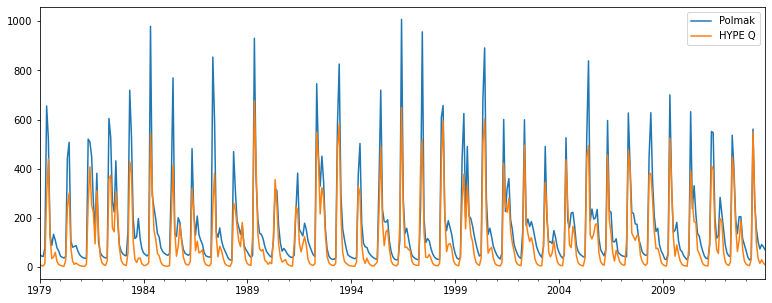

In [71]:
catch_df = pd.concat([nve_Q_m["Polmak"], hype_df], axis=1, join="inner")
catch_df.plot(figsize=(13,5))

<AxesSubplot:xlabel='HYPE Q', ylabel='Polmak'>

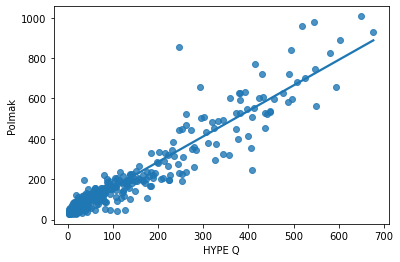

In [73]:
sb.regplot(x="HYPE Q", y="Polmak", ci=None, data=catch_df)